In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

##Encoding the Target Classes

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

##Creating Lists

In [ ]:
data = []
paths = []
result = []


##Connecting with GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

###This cell updates result list for images with tumor

In [ ]:
for r, d, f in os.walk(r'/content/gdrive/MyDrive/Colab Notebooks/datasets/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

###This cell updates result list for images without tumor

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/gdrive/MyDrive/Colab Notebooks/datasets/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape


(2891, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(2891,2)

##Splitting the Data into Training & Testing


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

#Creating Model


---


##1.   Using the sequential model and relu/ softmax activaiton function
##2.   flatteing the images to make them in one factor i.e. linearly
##3.   using categorical cross entropy with softmax




In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(2312, 2)

##Model Training with 30 epochs

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 [==============================] - 102s 2s/step - loss: 8.3571 - val_loss: 1.5919
Epoch 2/30
58/58 [==============================] - 97s 2s/step - loss: 0.6918 - val_loss: 0.3053
Epoch 3/30
58/58 [==============================] - 97s 2s/step - loss: 0.2656 - val_loss: 0.2506
Epoch 4/30
58/58 [==============================] - 97s 2s/step - loss: 0.1844 - val_loss: 0.2122
Epoch 5/30
58/58 [==============================] - 97s 2s/step - loss: 0.0951 - val_loss: 0.2326
Epoch 6/30
58/58 [==============================] - 97s 2s/step - loss: 0.0878 - val_loss: 0.2603
Epoch 7/30
58/58 [==============================] - 99s 2s/step - loss: 0.0697 - val_loss: 0.2590
Epoch 8/30
58/58 [==============================] - 97s 2s/step - loss: 0.0740 - val_loss: 0.2064
Epoch 9/30
58/58 [==============================] - 99s 2s/step - loss: 0.0490 - val_loss: 0.2595
Epoch 10/30
58/58 [==============================] - 99s 2s/step - loss: 0.0453 - val_loss: 0.2422
Epoch 11/30
58/58 

##Plotting the overall decrease in loss on every epoch


---


> From this plot it can be seen that the loss decreases and becomes negligible on every iteration of the epoch




---



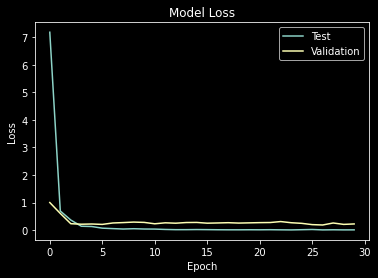

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

##Checking the model

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'



---
###Result of no tumour image


---



100.0% Confidence This Is No, Its not a tumor


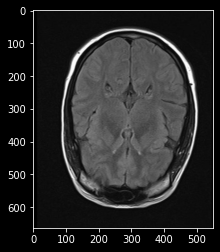

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/Colab Notebooks/datasets/no/No18.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))


---
###Result of yes tumour image


---


99.99998807907104% Confidence This Is A Its a Tumor


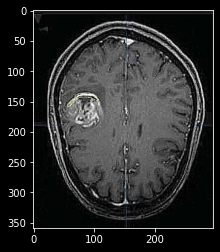

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/Colab Notebooks/datasets/yes/y1007.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

#Conclusion


---



1.   Model Explanation: THE CNN SEQUENTIAL MODEL IS
GENERATED BY IMPLEMENTING DIFFERENT LAYERS. THE INPUT IMAGE IS RESHAPED INTO
128x128. THE CONVOLVE LAYER IS APPLIED ON THE INPUT IMAGE WITH THE RELU AS ACTIVATION
FUNCTION, PADDING AS SAME WHICH MEANS THE OUTPUT IMAGES LOOKS LIKE THE INPUT IMAGE
AND THE NUMBER OF FILTERS ARE 32,64, 128 FOR DIFFERENT CONVOLVE LAYERS. THE MAX
POOLING APPLIED WITH THE 2X2 WINDOW SIZE AND DROPOUTS’ FUNCTION IS CALLED WITH 25%
OF DROPOUTS. FLATTEN METHOD IS APPLIED TO CONVERT THE FEATURES INTO ONE DIMENSIONAL
ARRAY. THE FULLY CONNECTED LAYER IS DONE BY CALLING THE DENSE METHOD WITH THE
NUMBER OF UNITS AS 128 AND RELU AS THE ACTIVATION FUNCTION
2.   Kaggale Dataset  https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

3.   Challange: was to decrease the loss rate.

4.   Dense was set to 2 because for categorical cross entropy the value should be 2 and the pool size for that very reason was also set to 2. The input shape was set to 128*128 since the loss in detail becomes less.
5. Optimization: The results were optimized by running 30 Epochs
6. Performance: The algo performance is excellent  since the loss is really low and the image size is also very low i.e. 128*128 pixels only so the peroformance is also good. and the result can be seen in the above 2 cells that have confidence level of more then 99%.


7.   Error analysis: from the loss plot we can see that more than 98% of the accuracy can be achieved with only 2% of loss
8.   Future Thought: To decrease the loss rate







---



